# Chapter 2. 사이킷런으로 시작하는 머신러닝

# 1. 사이킷런 소개와 특징

# 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

- 지도학습: 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식입니다.
- 하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들입니다.

In [2]:
# 사이킷런 패키지내의 모듈명은 sklearn으로 시작
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

# load data
iris = load_iris()
iris_data = iris.data # numpy
iris_label = iris.target # numpy

print("iris target value: ", iris_label)
print("iris target name: ", iris.target_names)

print()

# DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

print(iris_df.head(5))

iris target value:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name:  ['setosa' 'versicolor' 'virginica']

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [3]:
# train_test_split()을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할 가능
# numpy data와 label 입력
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2)

In [4]:
# DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier()

# 학습 -> fit 메서드 이용
df_clf.fit(X_train, y_train)

# 학습이 완료된 객체에서 test 데이터 세트로 예측 -> predict이용
pred = df_clf.predict(X_test)

# 평가 지표로 정확도 이용
from sklearn.metrics import accuracy_score
print("accuracy: {0:.4f}".format(accuracy_score(y_test, pred)))

accuracy: 0.9333


1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측합니다.
4. 평가: 예측된 결괏값과 테스트 데이터의 실제 결과값을 비교해서 ML 모델 성능을 평가합니다.

# 3. 사이킷런의 기반 프레임워크 익히기
사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공합니다.
- 분류와 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()를 제공합니다.
- 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 부릅니다.
- 이 둘(Classifier, Regressor)을 합쳐서 Estimator 클래스라고 부릅니다. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부릅니다.

비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction)등을 구현한 클래스는 fit()과 transform()을 제공합니다.
- fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업을 의미합니다.
- fit() 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행합니다.
- fit()과 transform()을 하나로 결합한 fit_transform()을 제공합니다.


머신러닝 모델을 구축하는 주요 프로세스
1. 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing)
2. ML 알고리즘 학습/예측 수행
3. 모델 평가의 단계
4. 1~3번을 반복적으로 수행하는 것 입니다.


데이터 set는 일반적으로 딕셔너리 형태로 되어 있습니다.
- data는 feature의 데이터 set을 가리킵니다.
- target은 분류 시 label 값이고 회귀일 때는 숫자 결과값 데이터 set입니다.
- target_names는 개별 label의 이름을 나타냅니다.
- feature_names는 feature의 이름을 나타냅니다.
- DESCR은 데이터 set에 대한 설명과 각 feature의 설명을 나타냅니다.

In [5]:
iris_data = load_iris()

print(type(iris_data))

print('-----------------------------------------------------------')
print(iris_data.keys())

print('-----------------------------------------------------------')
print(iris_data.target)
print(type(iris_data.target))
print('-----------------------------------------------------------')

print(iris_data.target_names)
print(type(iris_data.target_names))
print('-----------------------------------------------------------')

print(iris_data.feature_names)
print(type(iris_data.feature_names))
print('-----------------------------------------------------------')

print(iris_data.DESCR)
print(type(iris_data.DESCR))

<class 'sklearn.utils._bunch.Bunch'>
-----------------------------------------------------------
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
-----------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
-----------------------------------------------------------
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
-----------------------------------------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'list'>
-----------------------------------------------------------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data

# 4. Model Selection 모듈 소개

사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공합니다.

train_test_split()은 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받습니다.
- test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정합니다.(default:0.25)
- train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정합니다. (test_size를 사용하기 때문에 잘 안씀)
- shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정합니다.(default: True) 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용됩니다.
- random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값입니다.
- train_test_split()의 반환값은 튜플 형태입니다. 순차적으로 **train** data **feature** dataset, **test** data **feature** dataset, **train** data **label** dataset, **test** data **label** dataset을 반환합니다.

학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만 학습된 모델에 대해 **다양한 데이터를 기반으로 예측 성능을 평가**해보는 것도 매우 중요합니다.

과적합(Overfitting)은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말합니다.
고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생깁니다.
결국 해당 테스트 데이터에만 overfitting되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하됩니다.
-> 교차 검증을 이용해 문제 해결!

- K 폴드 교차 검증: K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법입니다.
EX)
1. K가 5인 경우 데이터 세트를 K등분(5등분)합니다.
2. 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정합니다. (학습: 1~4, 검증:5)
3. 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행합니다.
4. 이제 두 번째 반복을 진행합니다. 이때, 학습데이터와 검증 데이터를 변경합니다. (학습: 1~3, 5, 검증: 4)
5. 이런식으로 마지막 5번째까지 학습과 검증을 수행합니다.
6. K개의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영하면 됩니다.


 1 교차 검증 정확도: 1.0, 학습 데이터 크기120, 검증 데이터 크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 2 교차 검증 정확도: 0.9667, 학습 데이터 크기120, 검증 데이터 크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 3 교차 검증 정확도: 0.8333, 학습 데이터 크기120, 검증 데이터 크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 4 교차 검증 정확도: 0.9333, 학습 데이터 크기120, 검증 데이터 크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 5 교차 검증 정확도: 0.8, 학습 데이터 크기120, 검증 데이터 크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 평균 검증 정확도: 0.9066599999999999


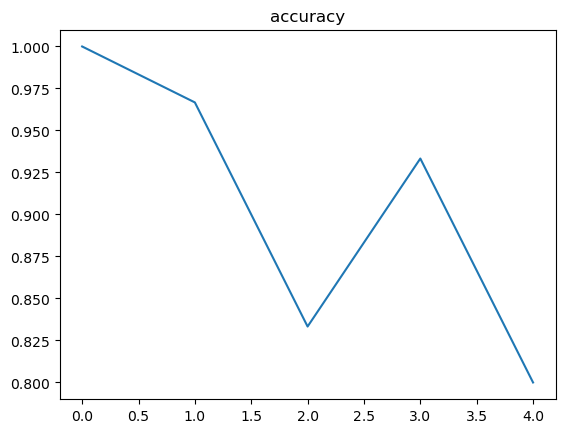

In [6]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy=[]

n_iter = 0

# KFold 객체의 split()호출 시, 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # index를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n {0} 교차 검증 정확도: {1}, 학습 데이터 크기{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size), end='\n')
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index)) # 교차 검증 마다 인덱스가 달라짐

    cv_accuracy.append(accuracy)


print('\n 평균 검증 정확도:', np.mean(cv_accuracy))


plt.figure()
plt.title('accuracy')
plt.plot(cv_accuracy)
plt.show()

Stratified K 폴드: 불균형한 분포도를 가진 label 데이터 집합을 위한 K 폴드 방식입니다.
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 분포가 한쪽으로 치우치는 것을 말합니다.

작은 비율로 1 레이블 값이 있다면 K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생합니다.
즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 상대적으로 많이 들어 있고, 다른 반복 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생합니다.
ex) 대출 사기 레이블의 경우 건수는 작지만 중요한 피처 값을 가지고 있습니다.

**원본 데이터의 레이블 분포를 먼저 고려한 후** 이 분포와 동일하게 학습과 검증 데이터 세트를 분배합니다.

In [7]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("교차 검증:{0}".format(n_iter))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts())
    print('------------------------------------')

교차 검증:1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
------------------------------------
교차 검증:2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
------------------------------------
교차 검증:3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64
------------------------------------



#1 교차 검증 정확도: 0.98, 학습 데이터 크기100, 검증 데이터 크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기100, 검증 데이터 크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기100, 검증 데이터 크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 평균 검증 정확도: 0.9666666666666667


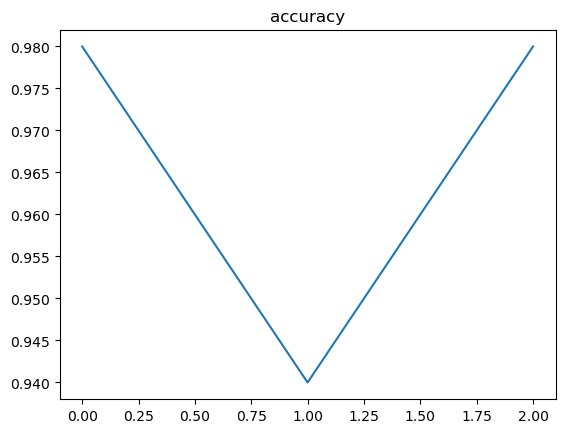

In [8]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
skfold = StratifiedKFold(n_splits=3)
cv_accuracy=[]

n_iter = 0

# KFold 객체의 split()호출 시, 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in skfold.split(features, label):
    # index를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size), end='\n')
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index)) # 교차 검증 마다 인덱스가 달라짐

    cv_accuracy.append(accuracy)


print('\n 평균 검증 정확도:', np.mean(cv_accuracy))


plt.figure()
plt.title('accuracy')
plt.plot(cv_accuracy)
plt.show()

**왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증을 해야합니다.**

분류 -> Stratified K 폴드

회귀 -> K 폴드

단순하게 생각하면 회귀는 연속적인 값이기 때문에 결정값별로 분포를 정하는 의미가 없습니다.


1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능 반환

이 1, 2, 3번의 과정을 한꺼번에 수행해주는 API가 cross_val_score() 입니다.

In [9]:
from sklearn.model_selection import cross_val_score, cross_validate

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
# parameter는 estimator, dataset, labelset, scoring, cv(교차 검증 폴드 수)
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print("교차 검증별 정확도: ", np.round(scores, 4))
print("평균 검증 정확도: ", np.mean(scores))

교차 검증별 정확도:  [0.98 0.92 0.98]
평균 검증 정확도:  0.96


cross_val_score()는 **classifier가 입력되면 Stratified K 폴드** 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할합니다.
회귀인 경우에는 K 폴드 방식으로 분할합니다.

cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환합니다. 그리고 이를 평균해 평가 수치로 사용합니다.

cross_validate()는 여러 개의 평가 지표를 반환할 수 있습니다. 성능 평가 지표와 수행시간도 같이 제공합니다.

GridSearchCV API를 이용해 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있습니다.

In [10]:
# 파라미터의 집합을 만들고 이를 순차적으로 적용
grid_parameter = {'max_depth':[1,2,3], 'min_samples_split':[2, 3]}

GridSearchCV는 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 합니다. 수행시간이 상대적으로 오래 걸릴 수 있습니다.

주요 파라미터
- estimator: classifier, regressor, pipeline 등
- param_grid: key+리스트 값을 가지는 딕셔너리가 주어집니다. 파라미터명과 값을 지정해줍니다.
- scoring: 성능을 측정할 평가 방법을 지정합니다.
- cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.
- refit: True시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습합니다.(default:True)

In [11]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2)
dtree = DecisionTreeClassifier()

grid_dtree = GridSearchCV(dtree, param_grid=grid_parameter, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)

print("GridSearchCV 최적 파라미터:", grid_dtree.best_params_) # 최고의 파라미터 저장
print("GridSearchCV 최고 정확도:{0:.4f}".format(grid_dtree.best_score_)) # 최고 점수 저장

scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9500


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.691667,5,0.675,0.700,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.691667,5,0.675,0.700,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.950000,1,0.975,0.925,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.950000,1,0.975,0.925,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.950000,1,1.000,0.900,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.950000,1,1.000,0.900,0.95


rank_test_score의 값이 1인 것이 예측 성능이 1위라는 의미입니다.

일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법입니다.

In [12]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# 이미 최적 학습이 됐으므로 별도의 학습이 필요 없음
pred = estimator.predict(X_test)

print("테스트 세트 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트 정확도: 0.9667


# 5. 데이터 전처리

어떤 데이터를 입력으로 가지느냐에 따라 결과가 크게 달라집니다. 때문에 데이터 전처리는 ML 알고리즘만큼 중요합니다.

결손값인 NaN, Null 값은 허용되지 않습니다.
- Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 쉽게 대체할 수 있습니다.
- Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋습니다.
- Null 값이 일정 수준 이상 되는 경우는 결정하기 힘듭니다. 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있기 때문입니다. 때문에 업무 로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야 합니다.

문자열을 입력 값으로 허용하지 않습니다. 때문에 문자열 값은 숫자로 인코딩돼서 변환해야합니다.

주민번호나 단순 문자열 아이디와 같은 경우 인코딩하지 않고 **삭제**하는 것이 더 좋습니다. 이러한 단순 식별자 피처는 데이터 로우를 식별하는 용도로 사용되어 예측에 중요한 요소가 될 수 없습니다. 때문에 알고리즘을 더 복잡하게 만들고 성능을 떨어뜨립니다.

데이터 인코딩
- Label encoding: 카테고리 피처를 코드형 숫자값으로 변환하는 방법
- One hot encoding: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지는 0으로 표시하는 방법

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '선풍기', '선풍기', '에어컨', 'TV']

# 객체 생성후 fit()과 transform()으로 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print("레이블 변환값: ", labels)
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본값:', encoder.inverse_transform([1, 3, 2, 0, 0, 0, 1, 2]))

레이블 변환값:  [0 1 4 2 2 3 0]
인코딩 클래스: ['TV' '냉장고' '선풍기' '에어컨' '전자레인지']
디코딩 원본값: ['냉장고' '에어컨' '선풍기' 'TV' 'TV' 'TV' '냉장고' '선풍기']


숫자의 크고 작음에 대한 특성이 작용하기 때문에 레이블 인코딩은 선형회귀와 같은 알고리즘에는 적용되지 않아야 합니다. 가중치가 부여되거나 더 중요하게 인식할 가능성이 발생하기 때문입니다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 상관없습니다.


One-Hot Encoding
1. 변환 전에 모든 문자열 값이 숫자형 값으로 변환돼야 합니다.
2. 입력 값으로 2차원 데이터가 필요합니다.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# 위 과정을 통해 labels은 label encoding을 통해 문자가 숫자로 변환 됨
labels = labels.reshape(-1, 1) # 2차원 데이터

# one-hot encoding
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('One-Hot encoding data')
print(oh_labels.toarray())
print(type(oh_labels))
print(oh_labels.shape)

One-Hot encoding data
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
<class 'scipy.sparse._csr.csr_matrix'>
(7, 5)


In [15]:
# pandas를 이용한 원-핫 인코딩
df = pd.DataFrame({'items' : ['TV', '냉장고', '전자레인지', '선풍기', '선풍기', '에어컨', 'TV']})

pd.get_dummies(df)

,items_TV,items_냉장고,items_선풍기,items_에어컨,items_전자레인지
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
5,False,False,False,True,False
6,True,False,False,False,False


이처럼 get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능합니다.

피처 스케일링(feature scaling): 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 말합니다.
- 표준화(Standardization): 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미합니다.
 
  ### $x_{i}\_new = \frac{x_{i}-mean(x)}{stdev(x)}$
  
- 정규화(Normalization): 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념입니다.
  모두 최소 0, 최대 1의 값으로 변환하는 것입니다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것입니다.
  
  ### $x_{i}\_new = \frac{x_{i}-mean(x)}{stdev(x)}$

  사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미합니다. 즉 개별 벡터를 모든 피처 벡터의 크기로 나눠줍니다.

  ### $x_{i}\_new = \frac{x_{i}}{\sqrt{x_{i}^{2}+y_{i}^{2}+z_{i}^{2}}}$

In [18]:
# 표준화 StandardScaler
# 개별 피처를 평균이 0, 분산이 1로 변환

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature들의 평균")
print(iris_df.mean())
print()
print("feature들의 분산")
print(iris_df.var())

feature들의 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [21]:
from sklearn.preprocessing import StandardScaler

# 객체 생성 후 데이터 세트 변환
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # numpy로 반환

iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)

# 평균 0, 분산 1로 변환
print("feature들의 평균")
print(iris_df_scaled.mean())
print()
print("feature들의 분산")
print(iris_df_scaled.var())

feature들의 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [24]:
# MinMaxScaler
# 데이터 값을 0과 1사이의 범위 값으로 변환
# 음수가 있으면 -1과 1사이 값으로 변환
# 데이터 분포가 가우시안 분포가 아니면 MinMaxScaler 적용

from sklearn.preprocessing import MinMaxScaler

# 객체 생성 및 데이터 세트 변환
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # numpy로 변환

iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)

print("feature들의 최소")
print(iris_df_scaled.min())
print()
print("feature들의 최대")
print(iris_df_scaled.max())

feature들의 최소
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용합니다.
- fit(): 데이터 변환을 위한 기준 정보 설정을 적용합니다.
- transform(): 설정된 정보를 이용해 데이터를 변환합니다.
- fit_transform(): fit()과 transform()을 한번에 적용합니다.

학습 데이터 세트로 fit()과 transform() 적용 시, **테스트 데이터 세트로는 다시 fit()을 수행하지 않고** 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 합니다.

테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못 합니다.

In [27]:
# 테스트 세트로 fit()을 적용하는 경우, 왜 안 되는지

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(train_array) # 최소 0, 최대 10

train_scaled = scaler.transform(train_array)

print("원본: ", train_array.reshape(-1))
print("변환: ", train_scaled.reshape(-1))

원본:  [ 0  1  2  3  4  5  6  7  8  9 10]
변환:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [28]:
# test set으로 학습한 경우
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print("원본: ", test_array.reshape(-1))
print("변환: ", test_scaled.reshape(-1))

원본:  [0 1 2 3 4 5]
변환:  [0.  0.2 0.4 0.6 0.8 1. ]


이렇게 되면 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래합니다.
- 학습 데이터의 10이 1로 변환
- 테스트 데이터의 5가 1로 변환

**반드시 테스트 데이터는 학습 데이터의 스케일링 기준을 따라야 합니다.**
테스트 데이터의 1 값은 학습 데이터와 동일하게 0.1로 변환돼야 합니다. 따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()이 적용된 scaler 객체를 이용하여 transform()으로 변환해야 합니다.

In [30]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
# 테스트 세트에 대하여 fit 없이 transform 적용
test_scaled = scaler.transform(test_array)

print("원본: ", train_array.reshape(-1))
print("변환: ", train_scaled.reshape(-1))
print()
print("원본: ", test_array.reshape(-1))
print("변환: ", test_scaled.reshape(-1))

원본:  [ 0  1  2  3  4  5  6  7  8  9 10]
변환:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본:  [0 1 2 3 4 5]
변환:  [0.  0.1 0.2 0.3 0.4 0.5]


모두 1/10 수준으로 동일하게 변환 됐음을 확인할 수 있습니다.
fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드이므로 **테스트 데이터에서는 절대 사용해서는 안 됩니다.**